In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms



In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root = 'PYTORCH_NOTEBOOKS/Data',train = True,transform = transform)

In [68]:
test_data = datasets.MNIST(root = 'PYTORCH_NOTEBOOKS/Data',train = False,transform = transform)

In [69]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: PYTORCH_NOTEBOOKS/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [70]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [71]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [72]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [73]:
type(train_data[0])

tuple

In [74]:
image,label = train_data[0]

In [75]:
image.size()

torch.Size([1, 28, 28])

In [76]:
label

5

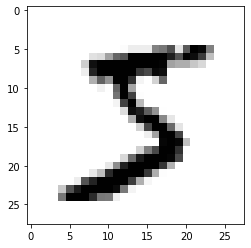

In [77]:
plt.imshow(image.reshape(28,28),cmap='gist_yarg') #virdis

In [78]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size= 100,shuffle = True)
test_loader = DataLoader(test_data,batch_size = 500,shuffle = False)

In [79]:
from torchvision.utils import make_grid

In [80]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array


In [81]:
for image,labels in train_loader:
    break

In [82]:
image.size()

torch.Size([100, 1, 28, 28])

In [83]:
labels.size

<function Tensor.size>

Labels:  [   4    6    2    3    4    0    9    5    0    1    6    9]


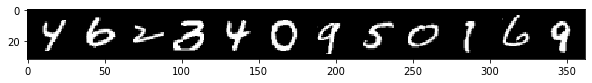

In [84]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(image[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [85]:
28*28

784

In [86]:
class MultilayerPerceptron(nn.Module):
    def __init__(self,in_layer = 784,output_layer = 10,layers = [120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_layer,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],output_layer)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x,dim = 1)# Multiclass classification

In [87]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [88]:
# ANN >>....CNN

In [89]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [90]:
#105,214 param total

In [91]:
#thats why cnn may help


In [92]:
criterion =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [93]:
image.shape # we hacve to flattenm it i.e 28*28*1

torch.Size([100, 1, 28, 28])

In [94]:
image.view(100,-1).shape

torch.Size([100, 784])

In [95]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.11840572  accuracy:  88.810%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.18243700  accuracy:  91.457%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.08808660  accuracy:  92.643%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.14944877  accuracy:  96.125%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.21808438  accuracy:  96.147%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.07716316  accuracy:  96.210%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.11002000  accuracy:  96.690%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.13098305  accuracy:  96.800%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.06813510  accuracy:  96.707%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.12932453  accuracy:  97.370%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.29275256  accuracy:  97.293%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.12646221  accuracy:  97.262%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.04753632  accuracy:  97.620%
epoch:  4  b